<a href="https://colab.research.google.com/github/Shreyas1063/DC-Project/blob/main/Bank_Insolvencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/DC_bank_1.csv')
df.head()

,Company Name,Year,Total income,Months,Change in stock,Total expenses,Total liabilities
0,'K' Steamship Agencies Pvt. Ltd.,31-03-2023,151.3,12,NaN,99.2,872.2
1,'X'Clusive Business Centre Pvt. Ltd.,31-03-2002,0.6,12,NaN,0.6,0.5
2,1 To 1 Help.Net Pvt. Ltd.,31-03-2023,336.4,12,NaN,272.4,228.1
3,10C India Internet Pvt. Ltd.,31-03-2023,60.6,12,NaN,53.7,92.3
4,10I Commerce Services Pvt. Ltd.,31-03-2022,661.0,12,-23.2,1875.5,45.8


In [ ]:
num_rows = df.shape[0]
print(f"\nTotal number of rows: {num_rows}")

# Verify if it has 1030 rows
if num_rows == 1030:
    print("The DataFrame has exactly 1030 rows.")
else:
    print(f"The DataFrame does not have 1030 rows; it has {num_rows} rows instead.")


Total number of rows: 54644
The DataFrame does not have 1030 rows; it has 54644 rows instead.


In [ ]:
row_1030 = df.iloc[1029]
print("Data in row 1030:\n")
print(row_1030)

Data in row 1030:

Company Name         Accenture Services Pvt. Ltd. [Merged]
Year                                            31-08-2004
Total income                                        8907.3
Months                                                  12
Change in stock                                        NaN
Total expenses                                      8228.5
Total liabilities                                   6736.9
Name: 1029, dtype: object


In [ ]:
df.shape

(54644, 7)

In [ ]:
df.isna().sum()

,0
Company Name,0
Year,0
Total income,8817
Months,0
Change in stock,31821
Total expenses,5149
Total liabilities,40


In [ ]:
column = df.columns
column


Index(['Company Name', 'Year', 'Total income', 'Months', 'Change in stock',
       'Total expenses', 'Total liabilities'],
      dtype='object')

In [ ]:
df.fillna(0, inplace=True)

Yaha insolvecy naam ka ek feature banaya hai jisme ham ye dekh rahe hai ki agar liabilities income se jyada hai toh insolvency true hai nahi toh false. Phir ham usse label Encoder se 0,1 me label kar rahe hai


In [ ]:
df['insolvency'] = df['Total liabilities'] > df['Total income']
df.head()

,Company Name,Year,Total income,Months,Change in stock,Total expenses,Total liabilities,insolvency
0,'K' Steamship Agencies Pvt. Ltd.,31-03-2023,151.3,12,0.0,99.2,872.2,True
1,'X'Clusive Business Centre Pvt. Ltd.,31-03-2002,0.6,12,0.0,0.6,0.5,False
2,1 To 1 Help.Net Pvt. Ltd.,31-03-2023,336.4,12,0.0,272.4,228.1,False
3,10C India Internet Pvt. Ltd.,31-03-2023,60.6,12,0.0,53.7,92.3,True
4,10I Commerce Services Pvt. Ltd.,31-03-2022,661.0,12,-23.2,1875.5,45.8,False


In [ ]:
row_1030 = df.iloc[1029]
row_4 = df.iloc[3]
print("Data in row 4:\n")
print(row_4)
print("Data in row 1030:\n")
print(row_1030)

Data in row 4:

Company Name         10C India Internet Pvt. Ltd.
Year                                   31-03-2023
Total income                                 60.6
Months                                         12
Change in stock                               0.0
Total expenses                               53.7
Total liabilities                            92.3
insolvency                                   True
Name: 3, dtype: object
Data in row 1030:

Company Name         Accenture Services Pvt. Ltd. [Merged]
Year                                            31-08-2004
Total income                                        8907.3
Months                                                  12
Change in stock                                        0.0
Total expenses                                      8228.5
Total liabilities                                   6736.9
insolvency                                           False
Name: 1029, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['insolvency'] = le.fit_transform(df['insolvency'])
df

,Company Name,Year,Total income,Months,Change in stock,Total expenses,Total liabilities,insolvency
0,'K' Steamship Agencies Pvt. Ltd.,31-03-2023,151.3,12,0.0,99.2,872.2,1
1,'X'Clusive Business Centre Pvt. Ltd.,31-03-2002,0.6,12,0.0,0.6,0.5,0
2,1 To 1 Help.Net Pvt. Ltd.,31-03-2023,336.4,12,0.0,272.4,228.1,0
3,10C India Internet Pvt. Ltd.,31-03-2023,60.6,12,0.0,53.7,92.3,1
4,10I Commerce Services Pvt. Ltd.,31-03-2022,661.0,12,-23.2,1875.5,45.8,0
...,...,...,...,...,...,...,...,...
54639,Zylog Systems Ltd.,31-03-2016,1421.4,12,0.0,2955.8,5875.3,1
54640,Zyma Laboratories Ltd. [Merged],31-03-2011,159.9,12,0.0,1.7,2253.7,1
54641,Zyphar'S Pharmaceutics Pvt. Ltd.,31-03-2023,572.2,12,32.9,578.8,385.8,0
54642,Zytel Agencies Ltd.,31-03-2022,0.0,12,0.0,0.0,32.7,1


In [ ]:
features = ['Total income', 'Total expenses', 'Total liabilities', 'Change in stock']

<Axes: >

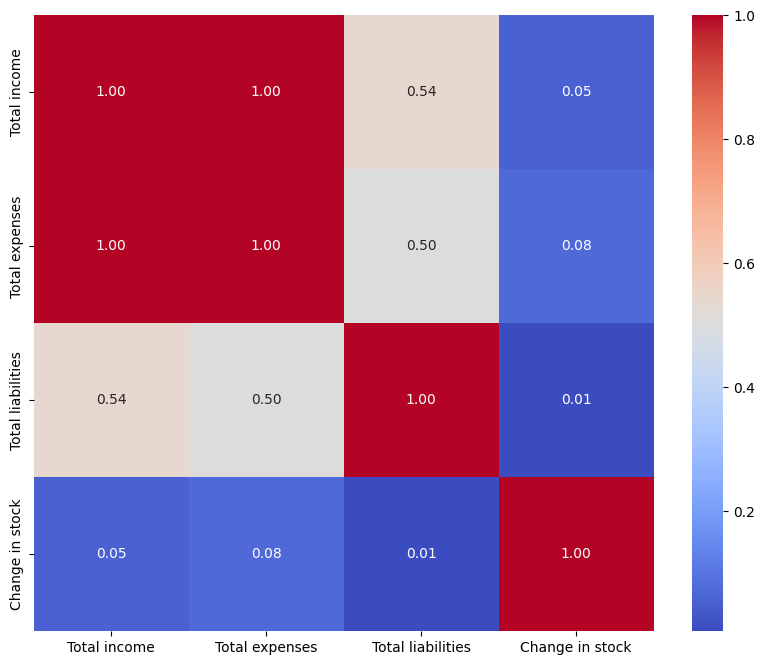

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')

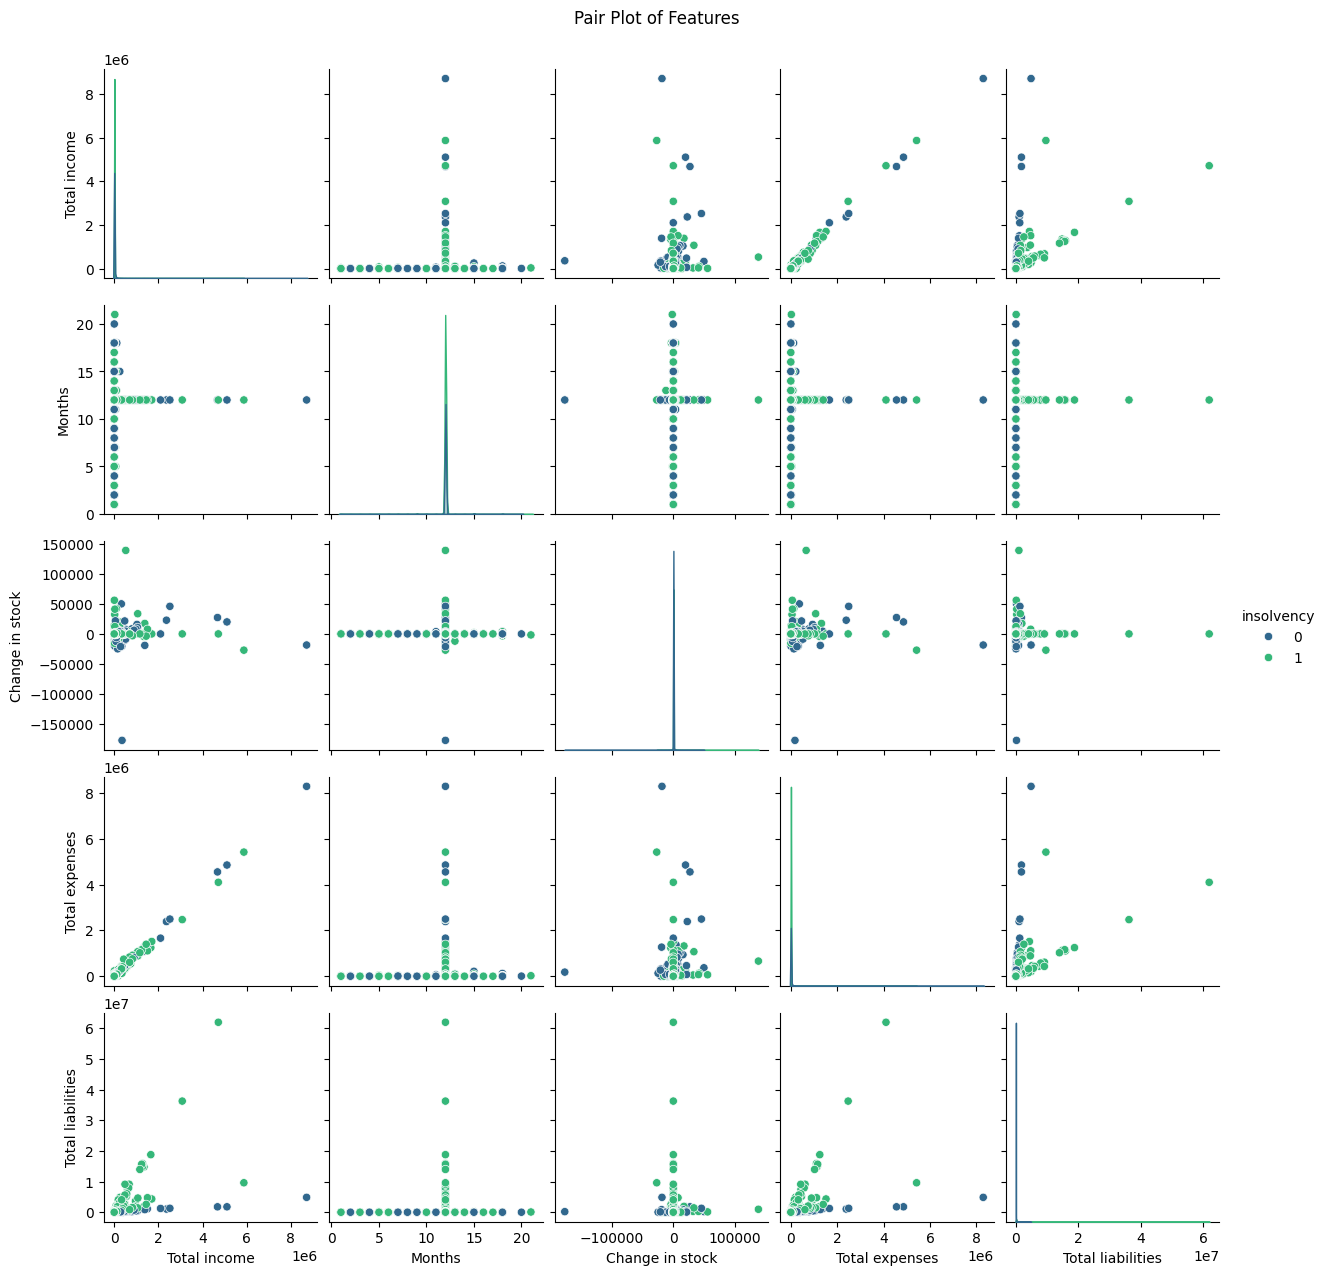

In [ ]:
sns.pairplot(df, hue='insolvency', palette='viridis')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df[features]
y = df['insolvency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression


Accuracy: 0.7495653765211822


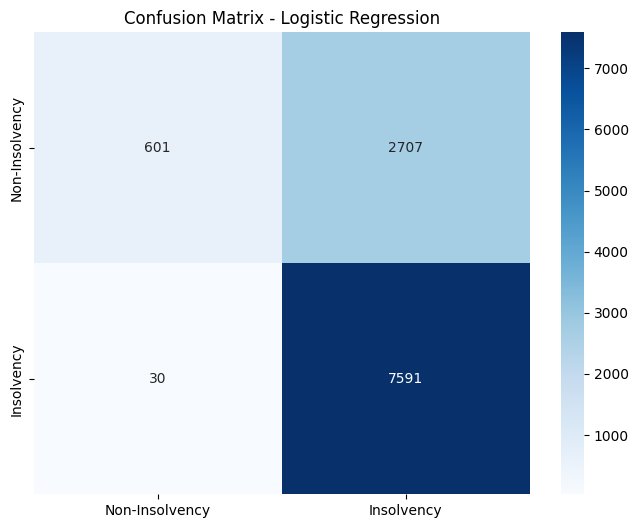

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.18      0.31      3308
           1       0.74      1.00      0.85      7621

    accuracy                           0.75     10929
   macro avg       0.84      0.59      0.58     10929
weighted avg       0.80      0.75      0.68     10929



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the Logistic Regression model
lg = LogisticRegression()
lg.fit(X_train_scaled, y_train)

# Predict the target on the test set
y_pred = lg.predict(X_test_scaled)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Insolvency', 'Insolvency'], yticklabels=['Non-Insolvency', 'Insolvency'])
plt.title("Confusion Matrix - Logistic Regression")  # Title for the plot
plt.show()  # Display the plot

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


#Decision tree

Accuracy: 0.9914905297831458
Confusion Matrix:
 [[3269   39]
 [  54 7567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3308
           1       0.99      0.99      0.99      7621

    accuracy                           0.99     10929
   macro avg       0.99      0.99      0.99     10929
weighted avg       0.99      0.99      0.99     10929



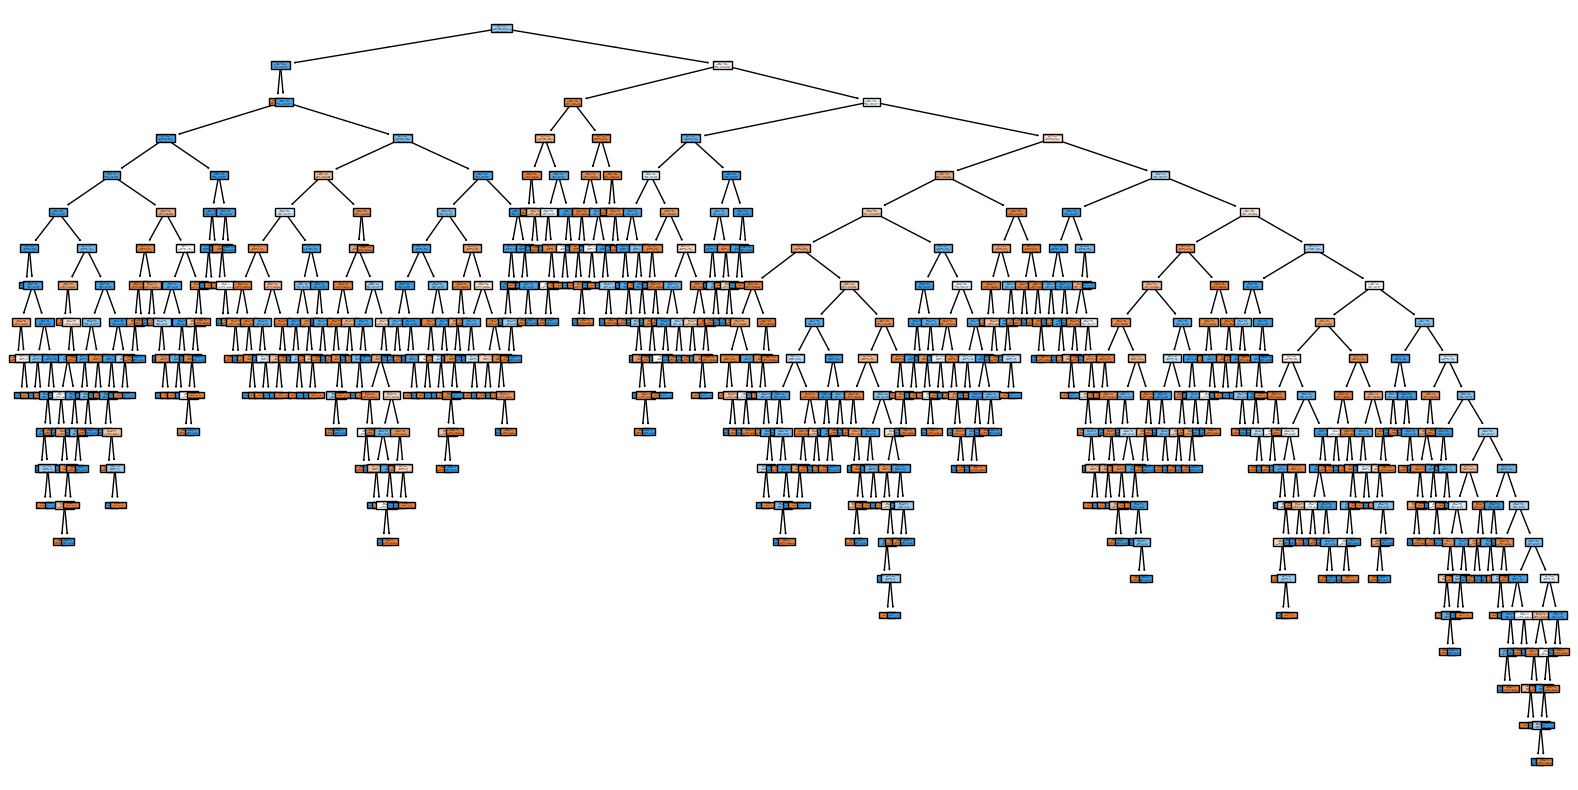

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=features, class_names=['Non-Insolvent', 'Insolvent'], filled=True)
plt.show()


Decision tree with less depth


Accuracy: 0.8703449537926617
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      3308
           1       0.95      0.86      0.90      7621

    accuracy                           0.87     10929
   macro avg       0.84      0.88      0.86     10929
weighted avg       0.89      0.87      0.87     10929



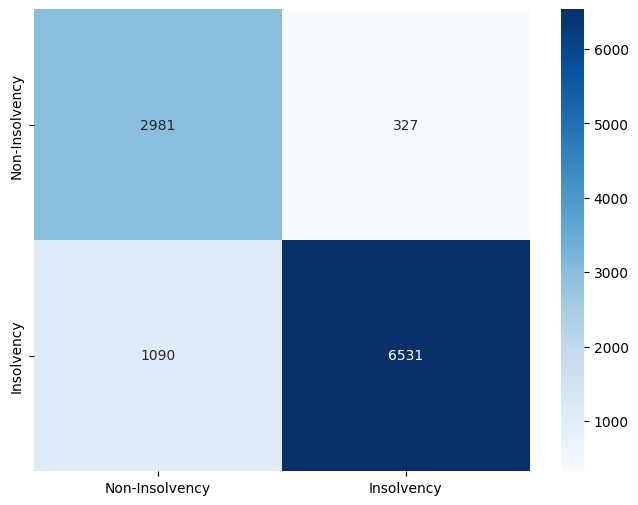

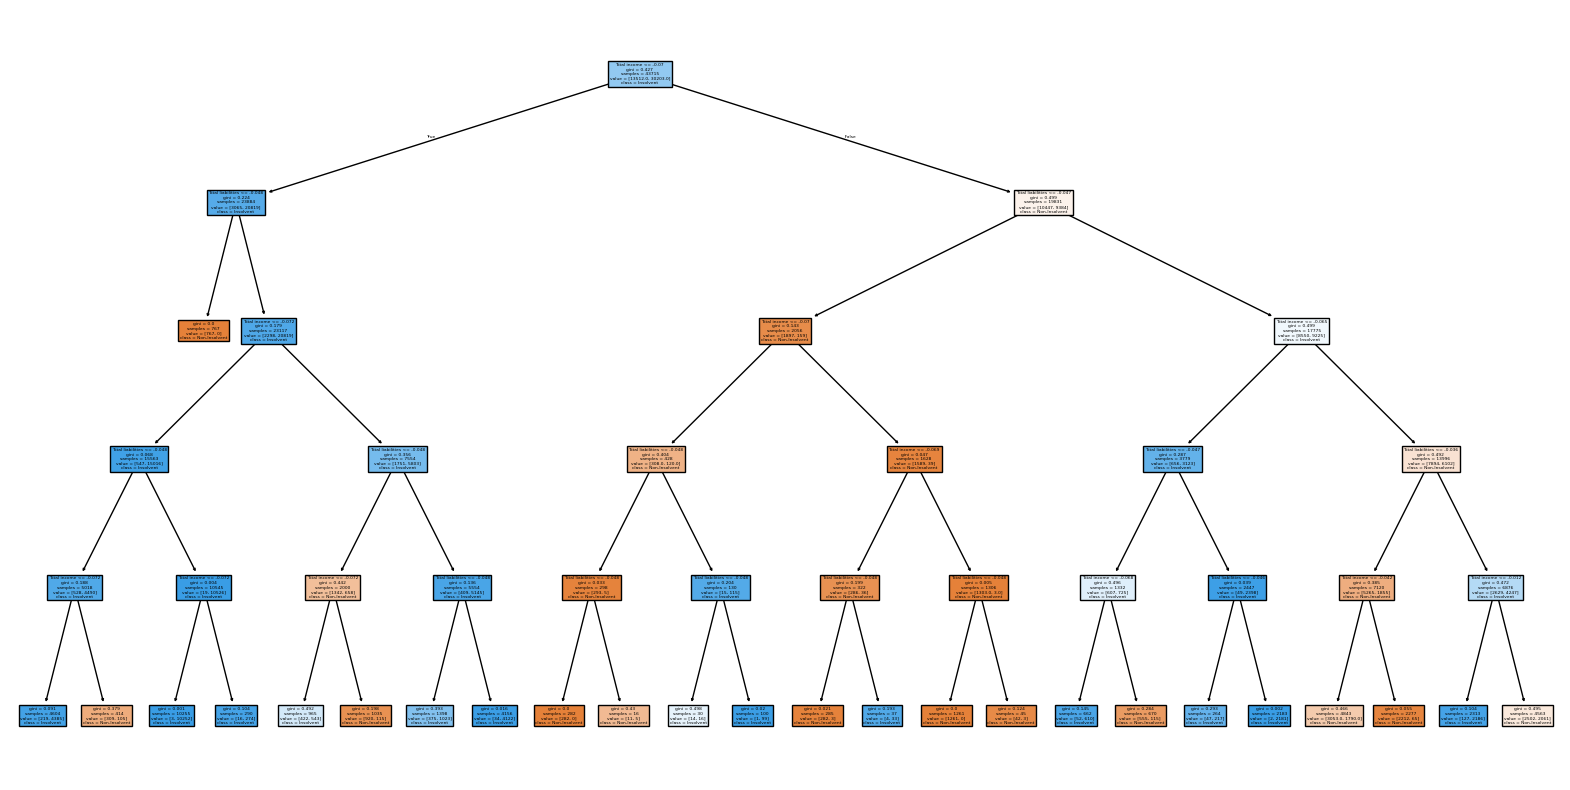

In [ ]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Insolvency', 'Insolvency'], yticklabels=['Non-Insolvency', 'Insolvency'])
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=features, class_names=['Non-Insolvent', 'Insolvent'], filled=True)
plt.show()


#Decicion final


Accuracy: 0.9690731082441212
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3308
           1       0.98      0.98      0.98      7621

    accuracy                           0.97     10929
   macro avg       0.96      0.96      0.96     10929
weighted avg       0.97      0.97      0.97     10929



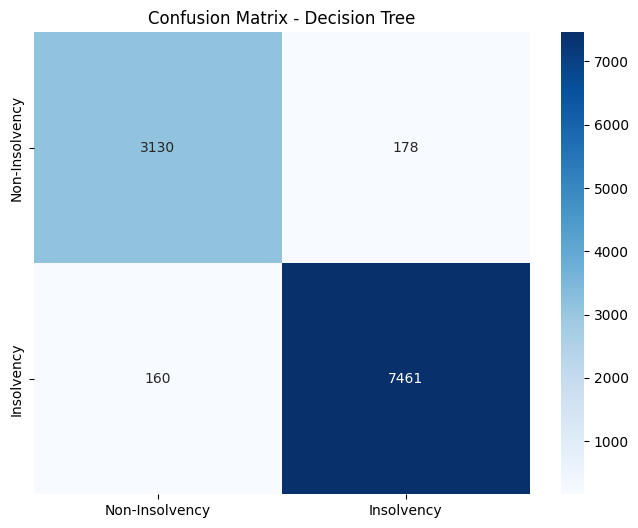

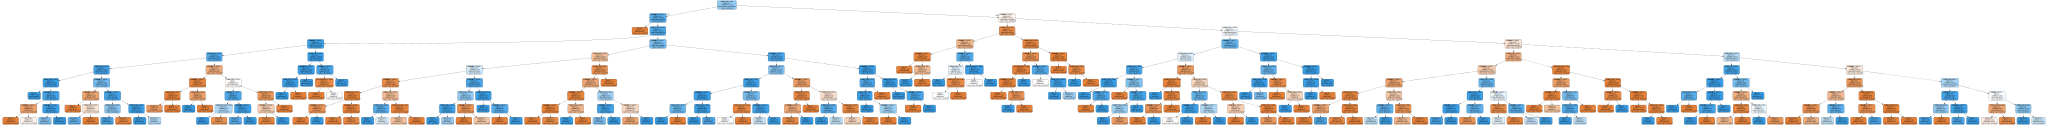

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import os

# Fit the Decision Tree model
clf = DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Insolvency', 'Insolvency'],
            yticklabels=['Non-Insolvency', 'Insolvency'])
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Visualization using Graphviz
from sklearn import tree
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=features,
                           class_names=['Non-Insolvent', 'Insolvent'],
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Use graphviz to render the .dot file to a visualization
graph = graphviz.Source(dot_data)
graph

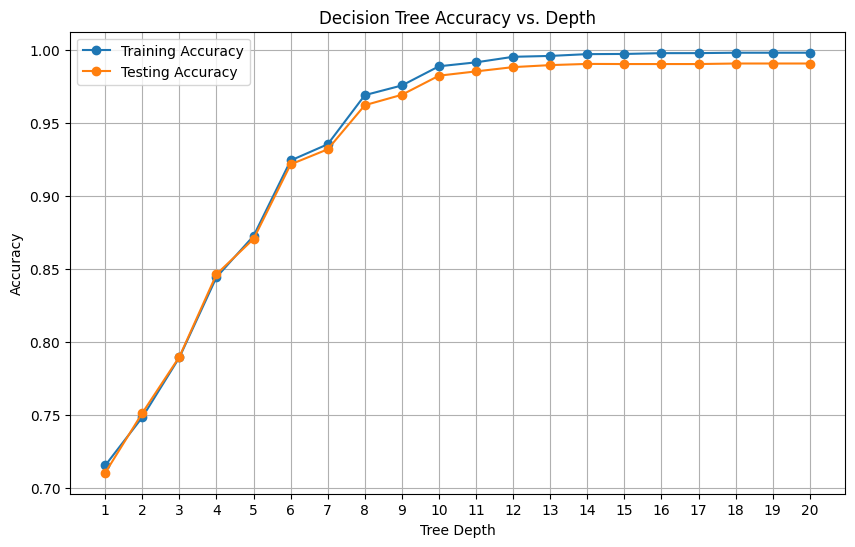

Best Depth: 18

Final Model Evaluation with Best Depth:
Accuracy: 0.9904840333058834


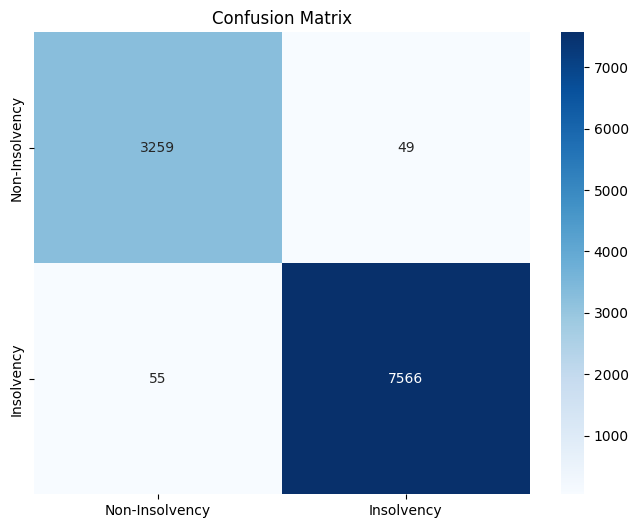

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3308
           1       0.99      0.99      0.99      7621

    accuracy                           0.99     10929
   macro avg       0.99      0.99      0.99     10929
weighted avg       0.99      0.99      0.99     10929



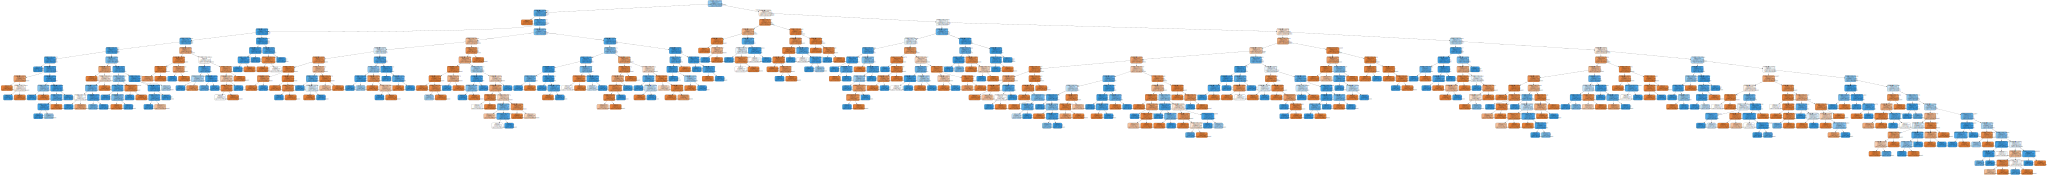

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import numpy as np

# Define a range of depths to test
depth_range = range(1, 21)  # Testing depths from 1 to 20
train_accuracies = []
test_accuracies = []

# Loop through each depth, train the model, and evaluate its performance
for depth in depth_range:
    # Initialize and train the Decision Tree model with the current depth
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=10, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # Evaluate on training data
    train_accuracy = clf.score(X_train_scaled, y_train)
    train_accuracies.append(train_accuracy)

    # Evaluate on testing data
    test_accuracy = clf.score(X_test_scaled, y_test)
    test_accuracies.append(test_accuracy)

# Plotting train and test accuracies vs depth
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_range, test_accuracies, label='Testing Accuracy', marker='o')
plt.xticks(depth_range)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

# Finding the best depth based on test accuracy
best_depth = depth_range[np.argmax(test_accuracies)]
print(f"Best Depth: {best_depth}")

# Retrain the model with the best depth
best_clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=10, random_state=42)
best_clf.fit(X_train_scaled, y_train)

# Make predictions and evaluate the final model
y_pred = best_clf.predict(X_test_scaled)
print("\nFinal Model Evaluation with Best Depth:")
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Insolvency', 'Insolvency'],
            yticklabels=['Non-Insolvency', 'Insolvency'])
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the best decision tree using Graphviz
dot_data = export_graphviz(best_clf,
                           out_file=None,
                           feature_names=features,
                           class_names=['Non-Insolvent', 'Insolvent'],
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100,max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train_scaled, y_train)

y_pred_train = clf_gini.predict(X_train_scaled)
y_pred_test = clf_gini.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.8724007777650692
Test Accuracy: 0.8703449537926617


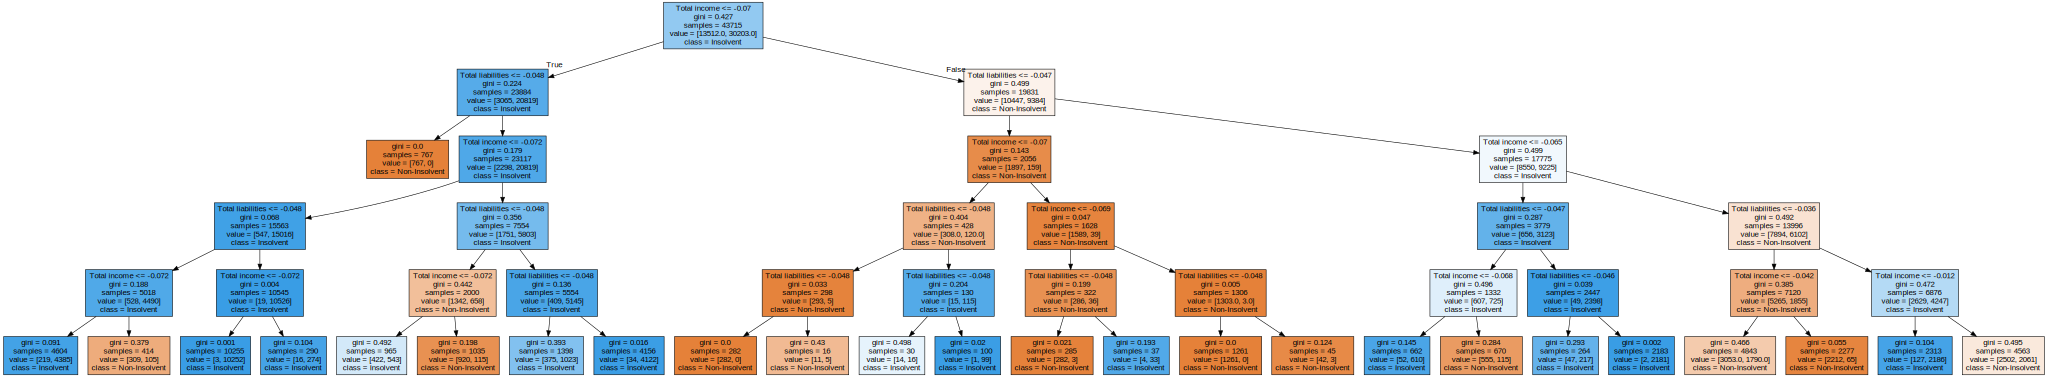

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=features, class_names=['Non-Insolvent', 'Insolvent'], filled=True)
graph = graphviz.Source(dot_data)
graph

#Random Forest

Accuracy: 0.9909415317046391
Confusion Matrix:
 [[3261   47]
 [  52 7569]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3308
           1       0.99      0.99      0.99      7621

    accuracy                           0.99     10929
   macro avg       0.99      0.99      0.99     10929
weighted avg       0.99      0.99      0.99     10929



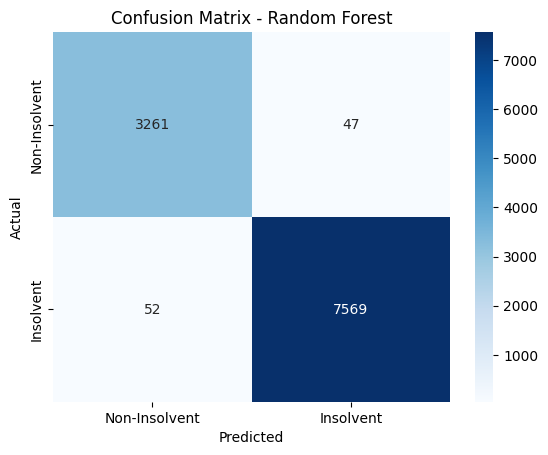

Predicted label for row 4: 1


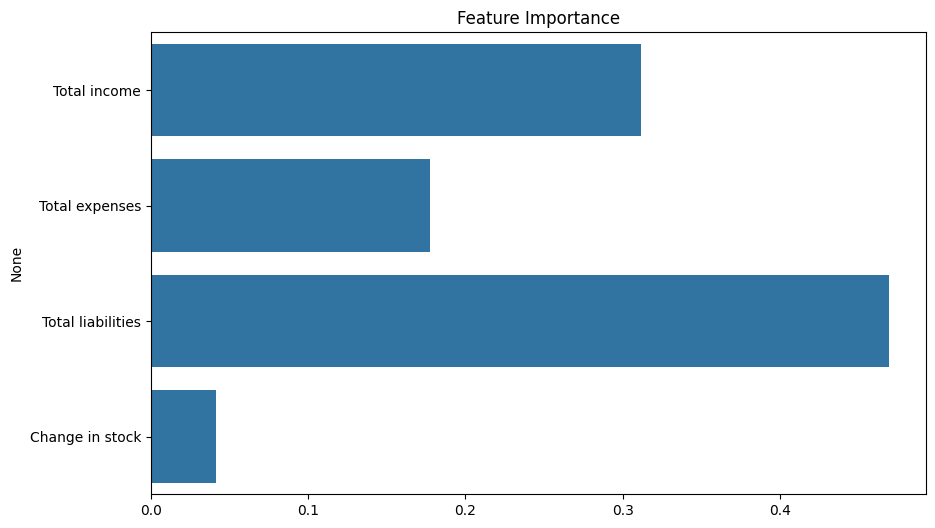

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
rf_clf.fit(X_train_scaled, y_train)

y_pred = rf_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Insolvent', 'Insolvent'], yticklabels=['Non-Insolvent', 'Insolvent'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Predict the label for row 1030 in the test set
# Use integer indexing directly on X_test_scaled since it's a NumPy array
row_4_prediction = rf_clf.predict([X_test_scaled[3]])  # Accessing row 1030 (index 1029)
print(f"Predicted label for row 4: {row_4_prediction[0]}")

importances = rf_clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

#Gradient Boosting Classifier

Accuracy: 0.9768505810229664
Confusion Matrix:
 [[3174  134]
 [ 119 7502]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3308
           1       0.98      0.98      0.98      7621

    accuracy                           0.98     10929
   macro avg       0.97      0.97      0.97     10929
weighted avg       0.98      0.98      0.98     10929



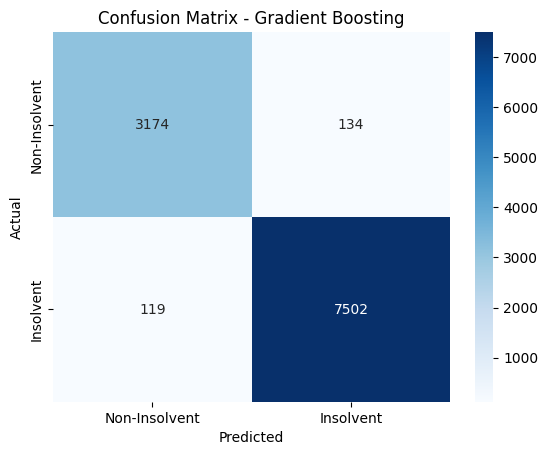

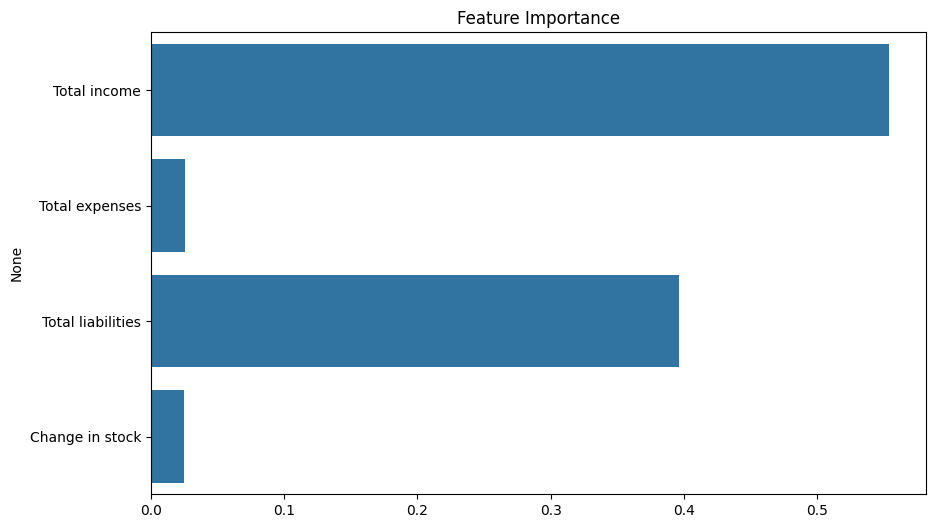

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = gb_clf.predict(X_test_scaled)

# Step 6: Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Insolvent', 'Insolvent'], yticklabels=['Non-Insolvent', 'Insolvent'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# Step 7: Feature Importance (Optional)
importances = gb_clf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

Accuracy: 0.7607283374508189


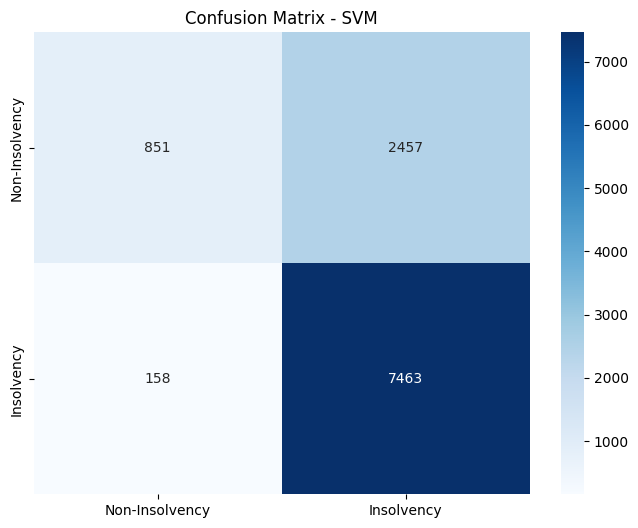

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.26      0.39      3308
           1       0.75      0.98      0.85      7621

    accuracy                           0.76     10929
   macro avg       0.80      0.62      0.62     10929
weighted avg       0.78      0.76      0.71     10929



In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Insolvency', 'Insolvency'], yticklabels=['Non-Insolvency', 'Insolvency'])
plt.title("Confusion Matrix - SVM")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

from matplotlib import pyplot as plt

In [ ]:
X = torch.tensor(X.values)
y = torch.tensor(y.values)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Sequential(
            nn.Linear(4, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
model = NeuralNetwork()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(X,y)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming X is a NumPy array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert features and target to tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Train-test split
train_size = int(0.8 * len(X_scaled))
test_size = len(X_scaled) - train_size
dataset = TensorDataset(X_scaled, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader parameters
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Neural Network model definition
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Sequential(
            nn.Linear(X_scaled.shape[1], 512),  # Dynamically set input size
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)  # Output layer for binary classification
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
loss_fn = nn.BCEWithLogitsLoss()  # Binary classification loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training parameters
epochs = 10
train_loss_log = []
test_loss_log = []
train_acc_log = []
test_acc_log = []

# Training loop
for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    train_correct = 0
    test_correct = 0

    print(f"Epoch {epoch+1}\n-------------------------------")

    # Training phase
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch).squeeze()
        y_batch = y_batch.squeeze()
        loss = loss_fn(y_pred, y_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate training loss and accuracy
        train_loss += loss.item() * X_batch.size(0)  # Sum up the batch loss
        predicted_labels = (torch.sigmoid(y_pred) > 0.5).float()
        train_correct += (predicted_labels == y_batch).sum().item()

    # Evaluation phase
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch).squeeze()
            y_batch = y_batch.squeeze()
            loss = loss_fn(y_pred, y_batch)

            test_loss += loss.item() * X_batch.size(0)  # Sum up the batch loss
            predicted_labels = (torch.sigmoid(y_pred) > 0.5).float()
            test_correct += (predicted_labels == y_batch).sum().item()

    # Calculate average losses and accuracies
    train_loss /= len(train_loader.dataset)
    test_loss /= len(test_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    test_accuracy = test_correct / len(test_loader.dataset)

    train_loss_log.append(train_loss)
    test_loss_log.append(test_loss)
    train_acc_log.append(train_accuracy)
    test_acc_log.append(test_accuracy)

    print(f"Train Stat:  Accuracy: {100 * train_accuracy:.2f}%, Loss: {train_loss:.6f}")
    print(f"Test Stat:   Accuracy: {100 * test_accuracy:.2f}%, Loss: {test_loss:.6f}\n")

print("Training Complete.")


Epoch 1
-------------------------------
Train Stat:  Accuracy: 74.73%, Loss: 0.536494
Test Stat:   Accuracy: 78.82%, Loss: 0.471657

Epoch 2
-------------------------------
Train Stat:  Accuracy: 79.83%, Loss: 0.471585
Test Stat:   Accuracy: 81.02%, Loss: 0.422127

Epoch 3
-------------------------------
Train Stat:  Accuracy: 82.70%, Loss: 0.402137
Test Stat:   Accuracy: 83.35%, Loss: 0.392596

Epoch 4
-------------------------------
Train Stat:  Accuracy: 84.35%, Loss: 0.373919
Test Stat:   Accuracy: 83.84%, Loss: 0.395957

Epoch 5
-------------------------------
Train Stat:  Accuracy: 85.90%, Loss: 0.344235
Test Stat:   Accuracy: 53.18%, Loss: 0.565280

Epoch 6
-------------------------------
Train Stat:  Accuracy: 86.51%, Loss: 0.340059
Test Stat:   Accuracy: 83.91%, Loss: 0.422102

Epoch 7
-------------------------------
Train Stat:  Accuracy: 87.25%, Loss: 0.322395
Test Stat:   Accuracy: 83.82%, Loss: 0.407690

Epoch 8
-------------------------------
Train Stat:  Accuracy: 87.89%


Overall Test Accuracy: 85.55%

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.53      0.69      3351
     Class 1       0.83      1.00      0.91      7578

    accuracy                           0.86     10929
   macro avg       0.91      0.76      0.80     10929
weighted avg       0.88      0.86      0.84     10929



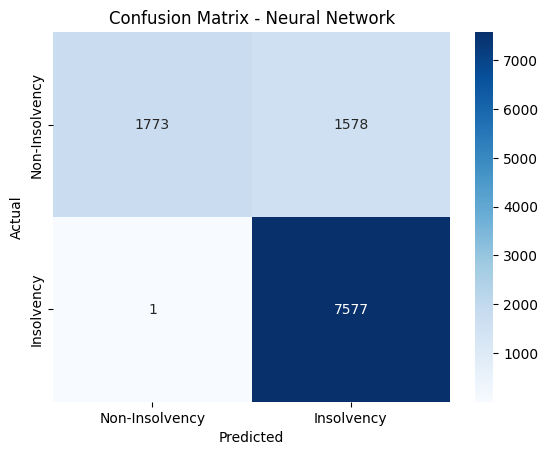

In [ ]:
# After training loop, evaluating on test set for detailed metrics
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch).squeeze()
        predicted_labels = (torch.sigmoid(y_pred) > 0.5).float()
        all_preds.extend(predicted_labels.tolist())
        all_labels.extend(y_batch.squeeze().tolist())

# Convert lists to NumPy arrays for sklearn metrics
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate overall accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"\nOverall Test Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=["Class 0", "Class 1"]))

sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Insolvency', 'Insolvency'], yticklabels=['Non-Insolvency', 'Insolvency'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Neural Network')
plt.show()


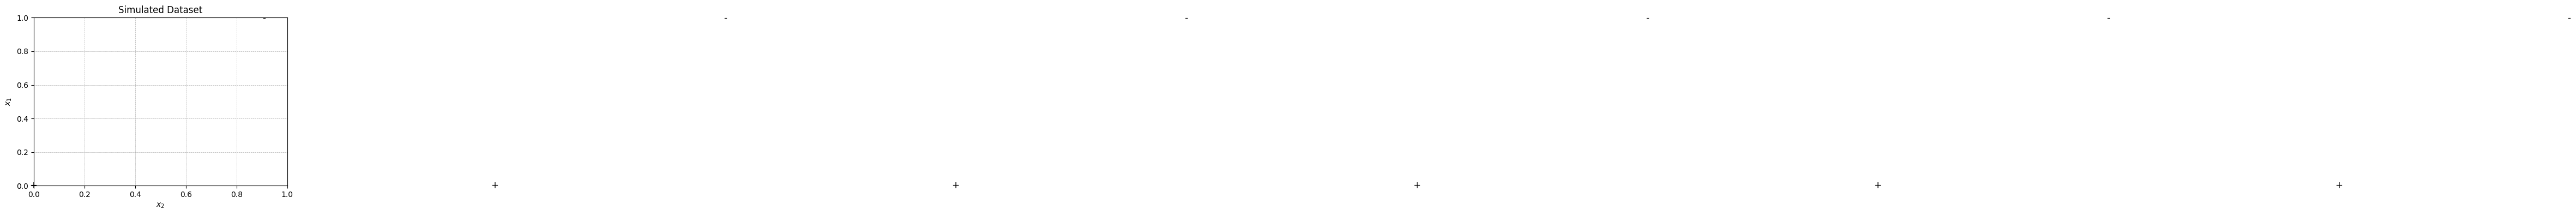

0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut

# Generate a dataset similar to the image
np.random.seed(42)
x2_values = np.linspace(0, 10, 12)  # 12 evenly spaced points along x2
x1_values = np.array([0, 1] * 6)    # Alternating classes along x1

# Assign class labels: "+" (1) and "-" (0), alternating
labels = np.array([1, 0] * 6)  # 1 for "+", 0 for "-"

# Create feature matrix X and label vector y
X = np.column_stack((x1_values, x2_values))
y = labels

# Plot the dataset
plt.figure(figsize=(6, 4))
for i in range(len(X)):
    plt.text(X[i, 1], X[i, 0], '+' if y[i] == 1 else '-', fontsize=12, ha='center', va='center')

plt.xlabel(r'$x_2$')
plt.ylabel(r'$x_1$')
plt.title("Simulated Dataset")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# Perform Leave-One-Out Cross-Validation
loo = LeaveOneOut()
misclassifications = 0

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train decision tree without pruning
    tree = DecisionTreeClassifier(criterion='entropy')  # ABC uses unpruned tree
    tree.fit(X_train, y_train)

    # Predict the left-out sample
    y_pred = tree.predict(X_test)

    # Count misclassification
    if y_pred != y_test:
        misclassifications += 1

# Total LOO-CV error
misclassifications


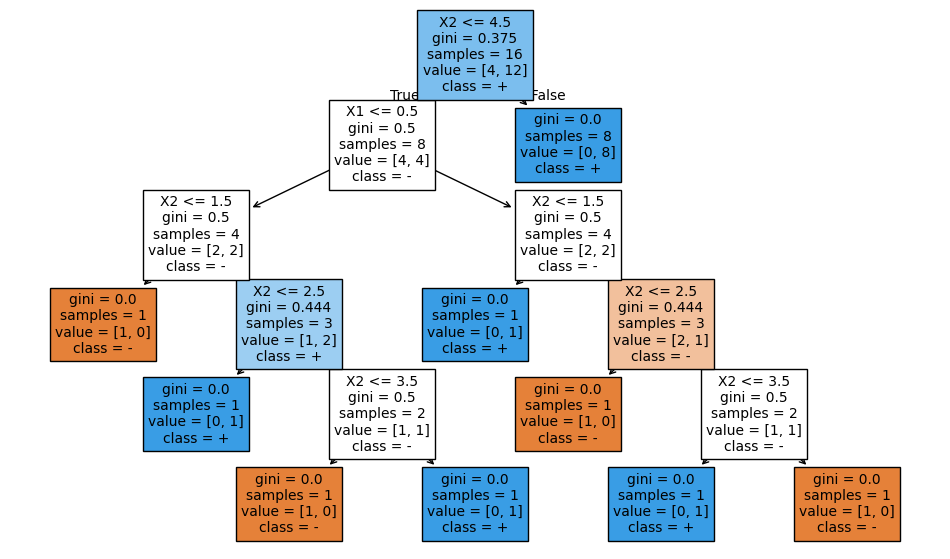

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Updated dataset with 16 entries
X = np.array([
    [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8],
    [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8]
])

# Assign interleaved class labels
y = np.array([0, 1, 0, 1, 1, 1, 1, 1,  # Upper row (x1 = 0)
              1, 0, 1, 0, 1, 1, 1, 1]) # Lower row (x1 = 1)

# Train an unpruned Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=None)
clf.fit(X, y)

# Plot the decision tree with increased size
plt.figure(figsize=(12, 7))
plot_tree(clf, filled=True, feature_names=["X1", "X2"], class_names=["-", "+"], fontsize=10)
plt.show()
